In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")
datas=[train,test]
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


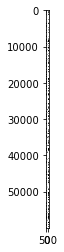

In [8]:
image_array = np.asfarray(train[1:])
plt.imshow(image_array,cmap='Greys',interpolation='None')
plt.show()

In [9]:
train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [10]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X=train[train.columns[1:]]
Y=train[train.columns[0]]

In [ ]:
rf = RandomForestClassifier()
##Grid Search
rf_param_grid={
    "max_depth":[None],
    "max_features":[1,3,10],
    "min_samples_split":[2,3,10],
    "min_samples_leaf":[1,3,10],
    "bootstrap":[False],
    "n_estimators":[10,30,50,70,80,100]
}
rf_grid = GridSearchCV(rf,param_grid=rf_param_grid,scoring = "accuracy",n_jobs=4,verbose=1)
rf_grid.fit(X,Y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   51.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.3min


In [ ]:
rf_best=rf_grid.best_estimator_
print(rf_grid.best_score_)
print(rf_best)

In [ ]:
gb = GradientBoostingClassifier()
##Grid Search
gb_param_grid={
    "loss":["deviance"],
    "n_estimators":[10,30,50,100],
    "learning_rate":[0.1,0.05,0.01],
    "max_depth":[4,8],
    "max_features":[0.3,0.1],
    "min_samples_leaf":[100,150,200],
}
gb_grid = GridSearchCV(gb,param_grid=gb_param_grid,scoring = "accuracy",n_jobs=4,verbose=1)
gb_grid.fit(X,Y)
gb_best=gb_grid.best_estimator_
print(gb_grid.best_score_)
print(gb_best)

In [ ]:
svc=SVC()
svc_param_grid = {
    'kernel':['rbf'],
    'gamma':[0.001,0.01,0.1,0.5,1],
    'C':[0.01,0.1,1,10,50,100,200,300]
}
svc_grid = GridSearchCV(svc,param_grid=svc_param_grid,scoring='accuracy',n_jobs=4,verbose=1)

svc_grid.fit(X,Y)
svc_best = svc_grid.best_estimator_
print(svc_grid.best_score_)
print(svc_best)
